In [1]:
%pip install torch==2.0.0
# Added because the default colab instance now has a newer version of colab
# This ended up breaking the following line below:
# dstr = SymbolicTransformerRegressor(from_pretrained=True)
# This is because PyTorch changed how it loads pickled files

In [2]:
# give colab permission to access drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Update these as required
repo_path = '/content/drive/MyDrive/github/subteams/LLMProbing'
odeformer_path = '/content/drive/MyDrive/aisc' # This is because I cloned the odeformer repo into my aisc folder
samples_path = '/content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/samples'
activations_path = '/content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/activations'
probes_path = '/content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes'

In [4]:
import sys
import importlib
sys.path.append(repo_path)
sys.path.append(odeformer_path)

In [5]:
import numpy as np
import os
import pickle

In [6]:
from odeformer.model import SymbolicTransformerRegressor
dstr = SymbolicTransformerRegressor(from_pretrained=True)

Found pretrained model at odeformer.pt
Loaded pretrained model


In [7]:
model_args = {'beam_size': 10, 'beam_temperature': 0.5}
dstr.set_model_args(model_args)

In [8]:
%load_ext autoreload
%autoreload 2

## Random Sample Generation

In [9]:
from src.sample_generation import RandomSamplesGenerator

In [10]:
operators_to_use = "id:1,add:1,mul:1,sin:0.5"
min_dimension = 1
max_dimension = 1
num_samples = 10
seed = 42
sample_descriptor = 'demo'

random_samples_path = f'{samples_path}/demo_random'

In [11]:
rsg = RandomSamplesGenerator()

In [12]:
rsg.generate_random_samples(random_samples_path, seed=seed, num_samples=num_samples, \
                            operators_to_use=operators_to_use, min_dimension=min_dimension, \
                            max_dimension=max_dimension, sample_descriptor='demo')

Generating demo samples: 100%|██████████| 10/10 [00:01<00:00,  5.15it/s]


[INFO] Data generation complete. Saved 10 demo samples to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/samples/demo_random


In [13]:
# Inspect a random sample to see its keys and some data
random_samples_dir = os.fsencode(random_samples_path)
for random_sample_file in os.listdir(random_samples_dir):
  random_sample_name = os.fsdecode(random_sample_file)
  random_sample_path = os.path.join(random_samples_path, random_sample_name)
  with open(random_sample_path, 'rb') as f:
      random_sample = pickle.load(f)
  print(random_sample.keys())
  print(f"Encoded equation: {random_sample['tree']}")
  print(f"Feature dictionary: {random_sample['feature_dict']}")
  break

dict_keys(['times', 'trajectory', 'tree_encoded', 'skeleton_tree_encoded', 'tree', 'skeleton_tree', 'infos', 'operator_dict', 'feature_dict'])
Encoded equation: -0.9998 * x_0
Feature dictionary: {'log': 0, 'exp': 0, 'tan': 0, 'arctan': 0, 'sin_cos': 0, 'arc_sin_cos': 0, 'pow2': 0, 'pow3': 0, 'inv': 0, 'sqrt': 0}


## Manual Sample Generation

In [14]:
from src.sample_generation import ManualSamplesGenerator

In [15]:
manual_samples_path = f'{samples_path}/demo_manual'
msg = ManualSamplesGenerator(samples_path=manual_samples_path)

In [16]:
# Times array
t_values = np.linspace(1, 10, 50)

# Exponential parameters
c_values = np.linspace(-10,10, 2)
a_values = np.linspace(-10,10, 5)

# Hyperbolic parameters
t0_values = np.linspace(10.1, 100, 5)

In [17]:
# Generate exponential samples
msg.generate_exponential_samples(t_values, c_values, a_values)

Generating exponential samples:   0%|          | 0/10 [00:00<?, ?it/s]

Saving generated samples: 10it [00:00, 94.72it/s]


[INFO] Data generation complete. Saved 10 exponential samples to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/samples/demo_manual


In [18]:
# Inspect an exponential sample to see its keys and some data
manual_samples_dir = os.fsencode(manual_samples_path)
for sample_file in os.listdir(manual_samples_dir):
  sample_name = os.fsdecode(sample_file)
  if "exp" in sample_name:
    exp_sample_path = os.path.join(manual_samples_path, sample_name)
    with open(exp_sample_path, 'rb') as f:
        exp_sample = pickle.load(f)
    print(exp_sample.keys())
    print(exp_sample['expression'])
    print(exp_sample['feature_dict'])
    break

dict_keys(['times', 'trajectory', 'parameters', 'feature_dict', 'expression'])
-10.0 * np.exp(10.0 * t)
{'exponential': 1, 'hyperbolic': 0}


In [19]:
# Generate hyperbolic samples
msg.generate_hyperbolic_samples(t_values, c_values, t0_values)

Generating hyperbolic samples:   0%|          | 0/10 [00:00<?, ?it/s]

Saving generated samples: 10it [00:00, 72.52it/s]


[INFO] Data generation complete. Saved 10 hyperbolic samples to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/samples/demo_manual


In [20]:
# Inspect a hyperbolic sample to see its keys and some data
manual_samples_dir = os.fsencode(manual_samples_path)
for sample_file in os.listdir(manual_samples_dir):
  sample_name = os.fsdecode(sample_file)
  if "hyp" in sample_name:
    hyp_sample_path = os.path.join(manual_samples_path, sample_name)
    with open(hyp_sample_path, 'rb') as f:
        hyp_sample = pickle.load(f)
    print(hyp_sample.keys())
    print(hyp_sample['expression'])
    print(hyp_sample['parameters'])
    print(hyp_sample['feature_dict'])
    break

dict_keys(['times', 'trajectory', 'parameters', 'feature_dict', 'expression'])
-10.0 / (10.1-t)
{'t0': 10.1, 'c': -10.0}
{'exponential': 0, 'hyperbolic': 1}


## Corresponding Activations Extraction

In [21]:
from src.activation_extraction import ActivationsExtractor

In [22]:
random_activations_path = f'{activations_path}/demo_random'
manual_activations_path = f'{activations_path}/demo_manual'

In [23]:
act_extractor = ActivationsExtractor()

In [24]:
act_extractor.extract_activations(dstr, random_samples_path, random_activations_path, layers_to_extract=['ffn'])

Extracting Activations:   0%|          | 0/10 [00:00<?, ?it/s]


Processing sample: demo_534895718


Extracting Activations:  10%|█         | 1/10 [00:02<00:20,  2.26s/it]


Processing sample: demo_199900595


Extracting Activations:  20%|██        | 2/10 [00:05<00:22,  2.79s/it]


Processing sample: demo_862061404


Extracting Activations:  30%|███       | 3/10 [00:07<00:16,  2.33s/it]


Processing sample: demo_787846414


Extracting Activations:  40%|████      | 4/10 [00:09<00:14,  2.47s/it]


Processing sample: demo_996406378


Extracting Activations:  50%|█████     | 5/10 [00:11<00:10,  2.17s/it]


Processing sample: demo_127521863


Extracting Activations:  60%|██████    | 6/10 [00:15<00:10,  2.65s/it]


Processing sample: demo_423734972


Extracting Activations:  70%|███████   | 7/10 [00:16<00:06,  2.15s/it]


Processing sample: demo_415968276


Extracting Activations:  80%|████████  | 8/10 [00:19<00:05,  2.60s/it]


Processing sample: demo_670094950


Extracting Activations:  90%|█████████ | 9/10 [00:22<00:02,  2.72s/it]


Processing sample: demo_841095289


Extracting Activations: 100%|██████████| 10/10 [00:25<00:00,  2.54s/it]


[INFO] Activation extraction complete. Activations saved to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/activations/demo_random


In [25]:
act_extractor.extract_activations(dstr, manual_samples_path, manual_activations_path, layers_to_extract=['ffn'])

Extracting Activations:   0%|          | 0/20 [00:00<?, ?it/s]


Processing sample: exp_0


Extracting Activations:   5%|▌         | 1/20 [00:04<01:26,  4.56s/it]


Processing sample: exp_1


Extracting Activations:  10%|█         | 2/20 [00:15<02:32,  8.46s/it]


Processing sample: exp_2


Extracting Activations:  15%|█▌        | 3/20 [00:19<01:48,  6.38s/it]


Processing sample: exp_3


Extracting Activations:  20%|██        | 4/20 [00:28<01:55,  7.20s/it]


Processing sample: exp_4


Extracting Activations:  25%|██▌       | 5/20 [00:35<01:51,  7.43s/it]


Processing sample: exp_5


Extracting Activations:  30%|███       | 6/20 [00:41<01:33,  6.67s/it]


Processing sample: exp_6


Extracting Activations:  35%|███▌      | 7/20 [00:52<01:47,  8.30s/it]


Processing sample: exp_7


Extracting Activations:  40%|████      | 8/20 [00:57<01:27,  7.31s/it]


Processing sample: exp_8


Extracting Activations:  45%|████▌     | 9/20 [01:06<01:23,  7.62s/it]


Processing sample: exp_9


Extracting Activations:  50%|█████     | 10/20 [01:15<01:19,  7.98s/it]


Processing sample: hyp_0


Extracting Activations:  55%|█████▌    | 11/20 [01:16<00:53,  5.91s/it]


Processing sample: hyp_1


Extracting Activations:  60%|██████    | 12/20 [01:17<00:34,  4.37s/it]


Processing sample: hyp_2


Extracting Activations:  65%|██████▌   | 13/20 [01:18<00:23,  3.37s/it]


Processing sample: hyp_3


Extracting Activations:  70%|███████   | 14/20 [01:21<00:19,  3.29s/it]


Processing sample: hyp_4


Extracting Activations:  75%|███████▌  | 15/20 [01:25<00:17,  3.55s/it]


Processing sample: hyp_5


Extracting Activations:  80%|████████  | 16/20 [01:26<00:11,  2.86s/it]


Processing sample: hyp_6


Extracting Activations:  85%|████████▌ | 17/20 [01:27<00:06,  2.25s/it]


Processing sample: hyp_7


Extracting Activations:  90%|█████████ | 18/20 [01:28<00:03,  1.90s/it]


Processing sample: hyp_8


Extracting Activations:  95%|█████████▌| 19/20 [01:31<00:02,  2.22s/it]


Processing sample: hyp_9


Extracting Activations: 100%|██████████| 20/20 [01:34<00:00,  4.73s/it]


[INFO] Activation extraction complete. Activations saved to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/activations/demo_manual


In [26]:
# Inspect a random activation and display its keys and some values
random_acts_dir = os.fsencode(random_activations_path)
for acts_file in os.listdir(random_acts_dir):
  acts_name = os.fsdecode(acts_file)
  random_acts_path = os.path.join(random_activations_path, acts_name)
  with open(random_acts_path, 'rb') as f:
      random_acts = pickle.load(f)
  print(random_acts.keys())
  print(random_acts['feature_dict'])
  print(random_acts['r2_score'])
  print(random_acts['expression'])
  print(random_acts['pred_expression'])
  break

dict_keys(['encoder', 'decoder', 'operator_dict', 'feature_dict', 'r2_score', 'pred_expression', 'expression'])
{'log': 0, 'exp': 0, 'tan': 0, 'arctan': 0, 'sin_cos': 0, 'arc_sin_cos': 0, 'pow2': 0, 'pow3': 0, 'inv': 0, 'sqrt': 0}
0.9999999755587363
-0.9998 * x_0
x_0' = -1.0000000000000000 * x_0



In [27]:
# Inspect a manual activation and display its keys and some values
manual_acts_dir = os.fsencode(manual_activations_path)
for acts_file in os.listdir(manual_acts_dir):
  acts_name = os.fsdecode(acts_file)
  manual_acts_path = os.path.join(manual_activations_path, acts_name)
  with open(manual_acts_path, 'rb') as f:
      manual_acts = pickle.load(f)
  print(manual_acts.keys())
  print(manual_acts['feature_dict'])
  print(manual_acts['r2_score'])
  print(manual_acts['expression'])
  print(manual_acts['pred_expression'])
  break

dict_keys(['encoder', 'decoder', 'feature_dict', 'r2_score', 'pred_expression', 'expression'])
{'exponential': 1, 'hyperbolic': 0}
-0.028363800080476453
-10.0 * np.exp(10.0 * t)
x_0' = 3.5986289978027344 * x_0



## Probe Training

In [28]:
import experiments

In [29]:
dir(experiments)
# Current experiment functions supported:
#   - separability_testing

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'run_experiment',
 'separability_testing']

In [30]:
target_feature = 'exponential'
activations_path = manual_activations_path
demo_probes_path = f'{probes_path}/demo_exp'
lr = 0.01
num_epochs = 1
num_repeats = 2
layers = [idx for idx in range(16)]

In [31]:
demo_expt_results = experiments.separability_testing(target_feature=target_feature, activations_path=manual_activations_path, \
                     probes_path=demo_probes_path, \
                     lr=lr, num_epochs=num_epochs, \
                     layers=layers, num_repeats=num_repeats)

Repeat 0 of layer 0



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]



Training Set (Epoch 1 - Final): Loss 0.04819266125559807, Accuracy 0.4375
Probe trained on layer 0: Test Set Loss 11.957834243774414, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_0_0.pt
Repeat 1 of layer 0



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]



Training Set (Epoch 1 - Final): Loss 0.04455079138278961, Accuracy 0.25
Probe trained on layer 0: Test Set Loss 4.183528900146484, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_0_1.pt
Repeat 0 of layer 1



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]



Training Set (Epoch 1 - Final): Loss 0.04939766600728035, Accuracy 0.1875
Probe trained on layer 1: Test Set Loss 1.5718964338302612, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_1_0.pt
Repeat 1 of layer 1



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]



Training Set (Epoch 1 - Final): Loss 0.045941226184368134, Accuracy 0.4375
Probe trained on layer 1: Test Set Loss 0.5813103914260864, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_1_1.pt
Repeat 0 of layer 2



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]



Training Set (Epoch 1 - Final): Loss 0.051025841385126114, Accuracy 0.625
Probe trained on layer 2: Test Set Loss 4.076800769325928e-05, Test Set Accuracy 1.0
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_2_0.pt
Repeat 1 of layer 2



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]



Training Set (Epoch 1 - Final): Loss 0.0645769014954567, Accuracy 0.375
Probe trained on layer 2: Test Set Loss 6.6873369216918945, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_2_1.pt
Repeat 0 of layer 3



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]



Training Set (Epoch 1 - Final): Loss 0.04365973919630051, Accuracy 0.5
Probe trained on layer 3: Test Set Loss 20.539142608642578, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_3_0.pt
Repeat 1 of layer 3



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]



Training Set (Epoch 1 - Final): Loss 0.08452016115188599, Accuracy 0.4375
Probe trained on layer 3: Test Set Loss 37.985477447509766, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_3_1.pt
Repeat 0 of layer 4



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]



Training Set (Epoch 1 - Final): Loss 0.14556291699409485, Accuracy 0.6875
Probe trained on layer 4: Test Set Loss 0.5370935628889129, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_4_0.pt
Repeat 1 of layer 4



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]



Training Set (Epoch 1 - Final): Loss 0.20246684551239014, Accuracy 0.5625
Probe trained on layer 4: Test Set Loss 7.711726307868943, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_4_1.pt
Repeat 0 of layer 5



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]



Training Set (Epoch 1 - Final): Loss 0.13933679461479187, Accuracy 0.4375
Probe trained on layer 5: Test Set Loss 0.9879175499081612, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_5_0.pt
Repeat 1 of layer 5



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]



Training Set (Epoch 1 - Final): Loss 0.1071503609418869, Accuracy 0.4375
Probe trained on layer 5: Test Set Loss 1.473420411348343, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_5_1.pt
Repeat 0 of layer 6



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]



Training Set (Epoch 1 - Final): Loss 0.03946688771247864, Accuracy 0.5625
Probe trained on layer 6: Test Set Loss 0.5167626366019249, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_6_0.pt
Repeat 1 of layer 6



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]



Training Set (Epoch 1 - Final): Loss 0.05316302552819252, Accuracy 0.4375
Probe trained on layer 6: Test Set Loss 0.5576206147670746, Test Set Accuracy 1.0
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_6_1.pt
Repeat 0 of layer 7



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]



Training Set (Epoch 1 - Final): Loss 0.050469812005758286, Accuracy 0.4375
Probe trained on layer 7: Test Set Loss 0.7370765954256058, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_7_0.pt
Repeat 1 of layer 7



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]



Training Set (Epoch 1 - Final): Loss 0.043484289199113846, Accuracy 0.5625
Probe trained on layer 7: Test Set Loss 0.7639918476343155, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_7_1.pt
Repeat 0 of layer 8



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]



Training Set (Epoch 1 - Final): Loss 0.04775529354810715, Accuracy 0.1875
Probe trained on layer 8: Test Set Loss 1.1568918228149414, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_8_0.pt
Repeat 1 of layer 8



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]



Training Set (Epoch 1 - Final): Loss 0.04798156023025513, Accuracy 0.5625
Probe trained on layer 8: Test Set Loss 1.1941663846373558, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_8_1.pt
Repeat 0 of layer 9



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]



Training Set (Epoch 1 - Final): Loss 0.04219921678304672, Accuracy 0.5625
Probe trained on layer 9: Test Set Loss 0.7899843277409673, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_9_0.pt
Repeat 1 of layer 9



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]



Training Set (Epoch 1 - Final): Loss 0.04261470213532448, Accuracy 0.5625
Probe trained on layer 9: Test Set Loss 0.7204708782956004, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_9_1.pt
Repeat 0 of layer 10



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]



Training Set (Epoch 1 - Final): Loss 0.038910843431949615, Accuracy 0.5
Probe trained on layer 10: Test Set Loss 0.13589703291654587, Test Set Accuracy 1.0
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_10_0.pt
Repeat 1 of layer 10



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]



Training Set (Epoch 1 - Final): Loss 0.06873979419469833, Accuracy 0.5625
Probe trained on layer 10: Test Set Loss 0.267105957493186, Test Set Accuracy 1.0
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_10_1.pt
Repeat 0 of layer 11



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]



Training Set (Epoch 1 - Final): Loss 0.045700594782829285, Accuracy 0.5625
Probe trained on layer 11: Test Set Loss 0.3973657637834549, Test Set Accuracy 1.0
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_11_0.pt
Repeat 1 of layer 11



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]



Training Set (Epoch 1 - Final): Loss 0.05451004207134247, Accuracy 0.4375
Probe trained on layer 11: Test Set Loss 0.4765033572912216, Test Set Accuracy 1.0
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_11_1.pt
Repeat 0 of layer 12



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]



Training Set (Epoch 1 - Final): Loss 0.06839190423488617, Accuracy 0.4375
Probe trained on layer 12: Test Set Loss 0.5281228125095367, Test Set Accuracy 1.0
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_12_0.pt
Repeat 1 of layer 12



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]



Training Set (Epoch 1 - Final): Loss 0.0408211424946785, Accuracy 0.375
Probe trained on layer 12: Test Set Loss 0.30055584013462067, Test Set Accuracy 1.0
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_12_1.pt
Repeat 0 of layer 13



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]



Training Set (Epoch 1 - Final): Loss 0.05067812278866768, Accuracy 0.5625
Probe trained on layer 13: Test Set Loss 0.5713530257344246, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_13_0.pt
Repeat 1 of layer 13



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]



Training Set (Epoch 1 - Final): Loss 0.049347057938575745, Accuracy 0.4375
Probe trained on layer 13: Test Set Loss 0.41274628043174744, Test Set Accuracy 1.0
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_13_1.pt
Repeat 0 of layer 14



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]



Training Set (Epoch 1 - Final): Loss 0.12662802636623383, Accuracy 0.4375
Probe trained on layer 14: Test Set Loss 0.7758118212223053, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_14_0.pt
Repeat 1 of layer 14



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]



Training Set (Epoch 1 - Final): Loss 0.03708064928650856, Accuracy 0.6875
Probe trained on layer 14: Test Set Loss 0.7748744757845998, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_14_1.pt
Repeat 0 of layer 15



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]



Training Set (Epoch 1 - Final): Loss 0.052261654287576675, Accuracy 0.5625
Probe trained on layer 15: Test Set Loss 1.210391603410244, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_15_0.pt
Repeat 1 of layer 15



Training LR Probe: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]


Training Set (Epoch 1 - Final): Loss 0.03565262630581856, Accuracy 0.625
Probe trained on layer 15: Test Set Loss 0.36347758769989014, Test Set Accuracy 1.0
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp/probe_exponential_15_1.pt


In [32]:
demo_expt_results

,layer,run,test_loss,test_accuracy,test_fail_ids,final_train_loss,final_train_accuracy,final_val_loss,final_val_accuracy
0,0,0,11.957834,0.5,[exp_4],0.048193,0.4375,3.475827e+01,0.0
1,0,1,4.183529,0.5,[exp_4],0.044551,0.2500,1.959861e+01,0.0
2,1,0,1.571896,0.5,[exp_4],0.049398,0.1875,1.527595e+01,0.0
3,1,1,0.581310,0.5,[exp_4],0.045941,0.4375,1.311768e+01,0.0
4,2,0,0.000041,1.0,[],0.051026,0.6250,7.502457e+00,0.5
5,2,1,6.687337,0.5,[exp_4],0.064577,0.3750,2.515908e+01,0.0
6,3,0,20.539143,0.5,[exp_4],0.043660,0.5000,5.452056e+01,0.0
7,3,1,37.985477,0.5,[exp_4],0.084520,0.4375,8.382232e+01,0.0
8,4,0,0.537094,0.5,[exp_4],0.145563,0.6875,4.177241e+00,0.0
9,4,1,7.711726,0.5,[hyp_2],0.202467,0.5625,4.172324e-07,1.0


In [33]:
import experiments.utils as expt_utils

demo_expt_summary = expt_utils.summarise_experiment(demo_expt_results)

In [34]:
demo_expt_summary

,layer,accuracy_mean,accuracy_std,loss_mean,loss_std
0,0,0.50,0.000000,8.070682,5.497264
1,1,0.50,0.000000,1.076603,0.700450
2,2,0.75,0.353553,3.343689,4.728632
3,3,0.50,0.000000,29.262310,12.336422
4,4,0.50,0.000000,4.124410,5.073231
5,5,0.50,0.000000,1.230669,0.343302
6,6,0.75,0.353553,0.537192,0.028891
7,7,0.50,0.000000,0.750534,0.019032
8,8,0.50,0.000000,1.175529,0.026357
9,9,0.50,0.000000,0.755228,0.049153


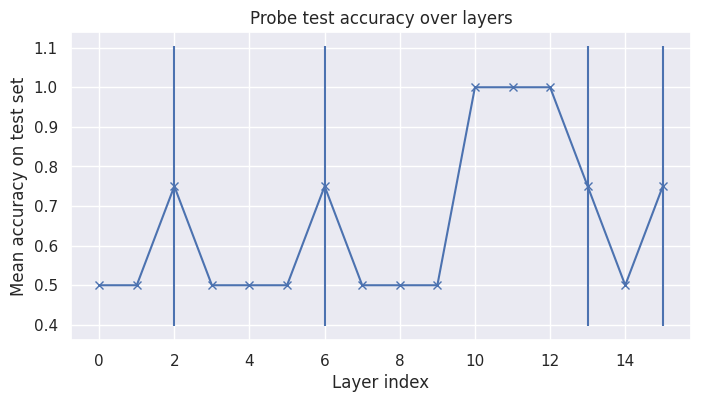

In [35]:
expt_utils.plot_from_summary(demo_expt_summary, descriptor='demo')

## Probe Loading and Evaluation

In [36]:
# TODO: write extra loading functionality for running an experiment using pretrained
# TODO: extend failure detection functionality